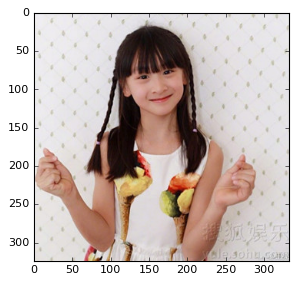

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

pil_im = Image.open('/home/gezi/data/imgs/im2txt/sendie.jpg', 'r')
imshow(np.asarray(pil_im))

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
pil_im = Image.open('/home/gezi/data/imgs/im2txt/sendie.jpg', 'r')
pil_im.show()

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

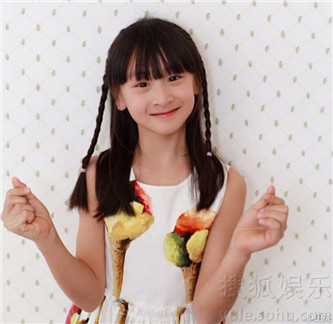

In [4]:
from IPython.display import Image as Image2
Image2('/home/gezi/data/imgs/im2txt/sendie.jpg')

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS

import glob, math

import gezi, melt
from deepiu.util import text2ids
from libgezi import utf82gbk, gbk2utf8
from deepiu.imtxt2txt.conf import TEXT_MAX_WORDS, INPUT_TEXT_MAX_WORDS, NUM_RESERVED_IDS, ENCODE_UNK

tensorflow_version: 1.1.0-rc0


Warning, no conf.py in current path use util conf


In [6]:
image_dir = '/home/gezi/data/imgs/im2txt/'

In [7]:
image_model_checkpoint_path = '/home/gezi/data/inceptionv3/inception_v3.ckpt'

In [8]:
image_model = melt.image.ImageModel(image_model_checkpoint_path)

INFO:tensorflow:Restoring image variables from checkpoint file /home/gezi/data/inceptionv3/inception_v3.ckpt
INFO:tensorflow:Restoring parameters from /home/gezi/data/inceptionv3/inception_v3.ckpt


In [9]:
vocab_path = '/home/gezi/new/temp/imtxt_keyword/tfrecord/seq-basic/vocab.txt'
text2ids.init(vocab_path)

ENCODE_UNK 0


In [10]:
model_dir = '/home/gezi/new/temp/imtxt_keyword/model/imtxt2txt/'
predictor = melt.Predictor(model_dir)

restore from /home/gezi/new/temp/imtxt_keyword/model/imtxt2txt/model.ckpt-8.7-210000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/imtxt_keyword/model/imtxt2txt/model.ckpt-8.7-210000


import graph ok /home/gezi/new/temp/imtxt_keyword/model/imtxt2txt/model.ckpt-8.7-210000.meta
restore ok /home/gezi/new/temp/imtxt_keyword/model/imtxt2txt/model.ckpt-8.7-210000


In [11]:
def _text2ids(text, max_words):
  word_ids = text2ids.text2ids(text, 
                               seg_method=FLAGS.seg_method, 
                               feed_single=FLAGS.feed_single, 
                               allow_all_zero=True, 
                               pad=False)
  word_ids = word_ids[:max_words]
  word_ids = gezi.pad(word_ids, max_words, 0)

  return word_ids

/home/gezi/data/imgs/im2txt/usa-campus.jpg 把孩子送到美国读高中，这十大事实怎能不知！


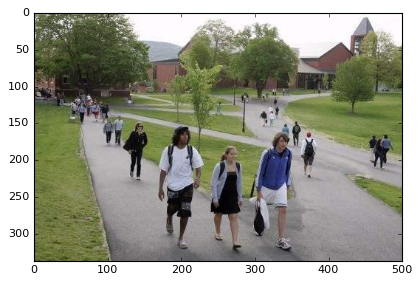

 /<EOS> 0.00503183 -5.29197215884
广场/<EOS> 0.00243242 -6.0188684745
小学/<EOS> 0.0022221 -6.10930162329
校园/<EOS> 0.00108163 -6.82928707995
日本/<EOS> 0.000783299 -7.15199565053
美国/<EOS> 0.000748248 -7.19777629863
北京/<EOS> 0.000560884 -7.48599673256
 / /<EOS> 0.00036237 -7.92284351515
英国/<EOS> 0.000237829 -8.34395694318
美国/交通/<EOS> 0.000195131 -8.54183959526
/home/gezi/data/imgs/im2txt/usa-class.jpg 把孩子送到美国读高中，这十大事实怎能不知！


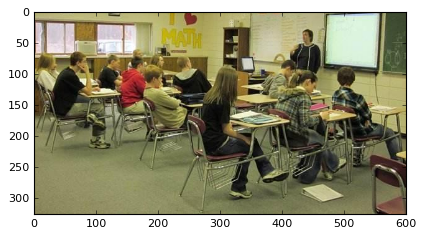

 /<EOS> 0.0176033 -4.03966622013
 / /<EOS> 0.00103211 -6.87614826795
美国/<EOS> 0.00100335 -6.9044122553
美国/留学/生/<EOS> 0.000666882 -7.3128976593
小/学生/上课/<EOS> 0.000581656 -7.4496316495
大/学生/上课/<EOS> 0.000545703 -7.51343634261
美国/大学/<EOS> 0.000476305 -7.64945222493
大/学生/<EOS> 0.000409837 -7.7997503348
美国/留学/<EOS> 0.000362623 -7.92214630167
日本/<EOS> 0.000348018 -7.96325496946
/home/gezi/data/imgs/im2txt/sendie.jpg 森碟九岁了！田亮晒女儿美照为其庆生


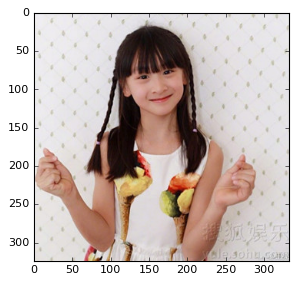

妈妈/<EOS> 0.00328677 -5.71784880183
田/乃/敏/<EOS> 0.000489276 -7.62258436669
爱/<EOS> 0.000455679 -7.69372176614
林/乃/敏/<EOS> 0.000352349 -7.9508886816
杨/乃/敏/<EOS> 0.000285018 -8.1629571915
陈/乃/敏/<EOS> 0.000279256 -8.18338299915
田/<EOS> 0.000274196 -8.20166682918
李/美/<EOS> 0.000224929 -8.3997278432
郭/乃/敏/<EOS> 0.000150478 -8.80169583201
林/<EOS> 0.00013184 -8.9339208089
beam_search using time(ms): 9270.21884918
/home/gezi/data/imgs/im2txt/usa-campus.jpg 美国高中生在学校的作息时间大致是，早七点半到下午两点半


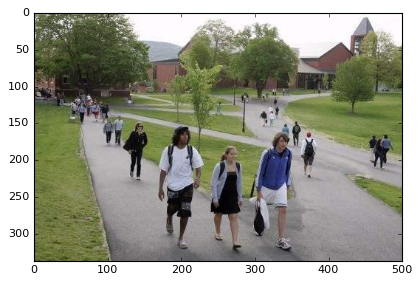

小学/<EOS> 0.00422324 -5.46715166319
学校/<EOS> 0.00348074 -5.66051146554
中学/<EOS> 0.00254676 -5.97293376488
小学/校园/<EOS> 0.0010089 -6.89889338242
东京/<EOS> 0.000947715 -6.96145628692
广州/中学/<EOS> 0.00087278 -7.04382705356
广州/<EOS> 0.000801787 -7.12866784535
深圳/<EOS> 0.000776826 -7.16029357586
小学/毕业/<EOS> 0.000746776 -7.19974473752
南/师大/<EOS> 0.000550915 -7.50392956412
/home/gezi/data/imgs/im2txt/usa-class.jpg 美国高中也分尖子班


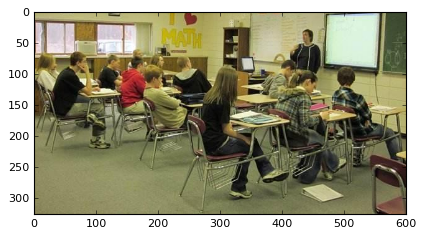

 /<EOS> 0.00390409 -5.54573060934
美国/高中/<EOS> 0.003855 -5.55838299916
 /school/<EOS> 0.00327588 -5.7211684925
小学/上课/<EOS> 0.00251788 -5.98433636049
美国/教室/<EOS> 0.00225239 -6.09576179047
小学/教室/<EOS> 0.00215117 -6.14174554165
小学/课堂/<EOS> 0.00199506 -6.21708202376
日本/高中/<EOS> 0.00105239 -6.85669607571
小学/<EOS> 0.000869393 -7.0477151577
美国/高中/上课/<EOS> 0.000684411 -7.28695206676
/home/gezi/data/imgs/im2txt/sendie.jpg 4月16日晚上，田亮在微博晒出了女儿田雨橙的照片，庆祝其九岁生日


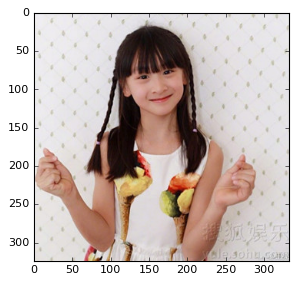

妈妈/<EOS> 0.00108772 -6.82367329908
田/晴/<EOS> 0.000791739 -7.14127923996
吉/田/<EOS> 0.000765937 -7.17441082423
田/田/敏/<EOS> 0.000647747 -7.3420105249
秀/<EOS> 0.000568882 -7.4718379709
田/<EOS> 0.000513147 -7.57494733435
田/乃/敏/<EOS> 0.00036697 -7.91022920317
田/田/<EOS> 0.000310922 -8.07596965798
田/秀/<EOS> 0.000284522 -8.1647014599
吉/田/敏/<EOS> 0.000279736 -8.18166256835
beam_search using time(ms): 7904.6728611
/home/gezi/data/imgs/im2txt/usa-campus.jpg 美国高中校园


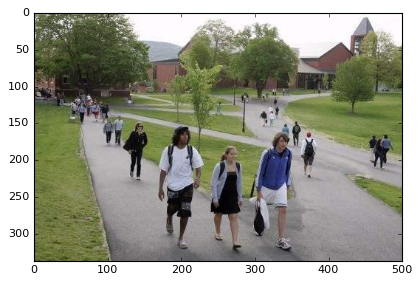

学校/<EOS> 0.00630636 -5.06619640789
校园/<EOS> 0.0055524 -5.1935253651
小学/<EOS> 0.00293813 -5.82998134118
小学/校园/<EOS> 0.00147466 -6.51932766204
美国/高中/<EOS> 0.00138261 -6.583779354
日本/<EOS> 0.00112528 -6.78972675779
校园/美/图/<EOS> 0.00102094 -6.88703342566
东京/<EOS> 0.00100556 -6.90221399308
美国/<EOS> 0.000959164 -6.94944861039
北京/<EOS> 0.000734023 -7.21696996615
/home/gezi/data/imgs/im2txt/usa-class.jpg 李易峰


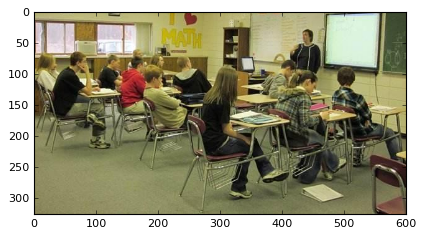

李/易/峰/<EOS> 0.0931062 -2.3740141519
李/易/峰/机场/<EOS> 0.00964179 -4.64164881023
李/易/峰/图片/<EOS> 0.00594765 -5.12475918304
李/易/峰/李/易/峰/<EOS> 0.00400343 -5.52060418786
李/多/峰/<EOS> 0.00249878 -5.9919519562
李/易/峰/整容/<EOS> 0.00238352 -6.03917595939
李/峰/峰/<EOS> 0.00233785 -6.05852460048
李/颖/<EOS> 0.00209169 -6.16978361115
李/嘉/峰/<EOS> 0.00202396 -6.20269871638
李/易/峰/的/照片/<EOS> 0.00184849 -6.29338645352
/home/gezi/data/imgs/im2txt/sendie.jpg 蛋糕图片


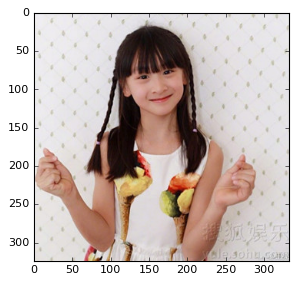

粽子/<EOS> 0.0100493 -4.60025310603
蛋/<EOS> 0.00594957 -5.12443682306
粽子/图片/<EOS> 0.0033948 -5.6855111141
蛋/蛋/<EOS> 0.00329937 -5.71402502551
成龙/<EOS> 0.00295119 -5.82554629003
baby/<EOS> 0.00190541 -6.26305772043
朱茵/<EOS> 0.00178459 -6.32856843292
蛋/仙子/<EOS> 0.00174792 -6.34932946685
美女/<EOS> 0.00161023 -6.43137979862
蛋/酥/<EOS> 0.00130658 -6.64034319943
beam_search using time(ms): 9844.92707253
/home/gezi/data/imgs/im2txt/usa-campus.jpg 这是什么


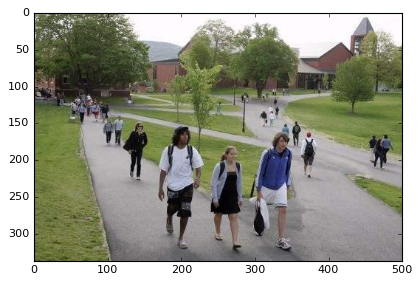

广场/<EOS> 0.00147045 -6.52218532376
小学/<EOS> 0.000926474 -6.98412420596
学校/<EOS> 0.000849465 -7.07090378938
广场/广场/<EOS> 0.0007268 -7.22685913518
校园/<EOS> 0.000411571 -7.79552794404
校园/广场/<EOS> 0.000373634 -7.89223295241
学校/广场/<EOS> 0.000364693 -7.91645338249
深圳/<EOS> 0.000233944 -8.36043073228
广州/<EOS> 0.000164015 -8.71555426587
成都/<EOS> 0.000151777 -8.79309841336
/home/gezi/data/imgs/im2txt/usa-class.jpg 今天天气不错


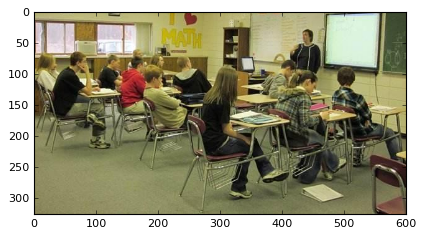

天/天/<EOS> 0.00931303 -4.67634106607
抢/天/<EOS> 0.00214017 -6.1468715541
破/天/<EOS> 0.0014742 -6.51963756457
天气/<EOS> 0.00146507 -6.52584887685
北京/天/天/<EOS> 0.00110541 -6.80754135193
不/天/<EOS> 0.00102816 -6.87997963029
机场/<EOS> 0.00100385 -6.90391729149
天/天/了/<EOS> 0.000905528 -7.00699233214
天/了/<EOS> 0.00076887 -7.1705880493
天/来/<EOS> 0.000666298 -7.31377314497
/home/gezi/data/imgs/im2txt/sendie.jpg 美女脱衣


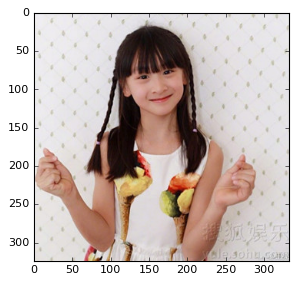

少妇/脱/了/<EOS> 0.00652027 -5.03283929329
美女/<EOS> 0.00647186 -5.04029133696
美女/脱/了/<EOS> 0.00646768 -5.04093745575
少妇/<EOS> 0.0060119 -5.11401412642
美女/脱/内裤/<EOS> 0.00484802 -5.32918593018
美女/脱/衣/<EOS> 0.00388302 -5.55114081299
少妇/脱/内裤/<EOS> 0.00385963 -5.557184234
美女/脱/照/<EOS> 0.0035125 -5.65142675561
美女/高潮/<EOS> 0.003489 -5.65813877517
少妇/高潮/<EOS> 0.00323475 -5.73380330704
beam_search using time(ms): 13146.7468739
/home/gezi/data/imgs/im2txt/usa-campus.jpg 


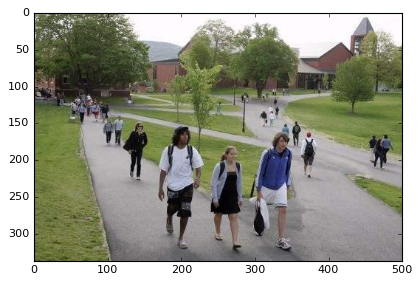

 /<EOS> 0.00136919 -6.59353872193
墨尔本/<EOS> 4.85703e-05 -9.9324979807
成都/<EOS> 2.84787e-05 -10.4663524513
北京/大学/<EOS> 2.82044e-05 -10.4760341682
广州/大学/<EOS> 2.67421e-05 -10.5292720642
上海/大学/<EOS> 2.64022e-05 -10.5420646613
广州/<EOS> 2.48997e-05 -10.6006545718
加州/<EOS> 2.47303e-05 -10.6074819489
 / /<EOS> 1.97549e-05 -10.8321075346
纽约/<EOS> 1.87738e-05 -10.8830490231
/home/gezi/data/imgs/im2txt/usa-class.jpg 


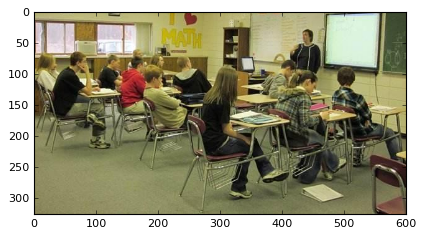

 /<EOS> 0.00227612 -6.08528467281
 /house/<EOS> 0.000139815 -8.87518977582
泰国/<EOS> 2.67016e-05 -10.5307865134
 /house/ /<EOS> 2.46169e-05 -10.6120757995
北京/大学/<EOS> 2.40876e-05 -10.6338119487
 / /<EOS> 1.94133e-05 -10.8495531475
德国/<EOS> 1.66851e-05 -11.0009937689
中国/大学/<EOS> 1.31413e-05 -11.2397489649
英国/<EOS> 1.18875e-05 -11.3400268389
北京/<EOS> 1.15017e-05 -11.3730173592
/home/gezi/data/imgs/im2txt/sendie.jpg 


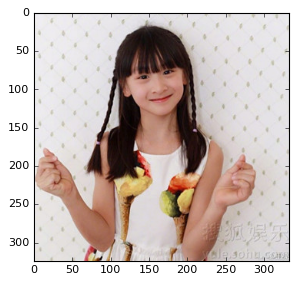

 /<EOS> 0.000378688 -7.87879849524
girl/<EOS> 0.000216049 -8.44000628257
beauty/<EOS> 0.00015165 -8.7939338506
 /girl/<EOS> 6.81254e-05 -9.59416007895
韩国/<EOS> 3.48883e-05 -10.2633591204
girl/ /<EOS> 3.42562e-05 -10.2816429406
美女/<EOS> 3.08638e-05 -10.3859252551
日本/<EOS> 2.54272e-05 -10.5796928814
韩国/美女/<EOS> 1.3561e-05 -11.2083101298
beauty/ /<EOS> 1.04181e-05 -11.4719686813
beam_search using time(ms): 10879.9319267
/home/gezi/data/imgs/im2txt/usa-campus.jpg 这是什么


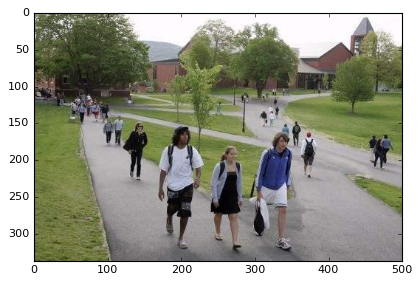

广场/<EOS> 0.00147045 -6.52218532376
小学/<EOS> 0.000926474 -6.98412420596
学校/<EOS> 0.000849465 -7.07090378938
广场/广场/<EOS> 0.0007268 -7.22685913518
校园/<EOS> 0.000411571 -7.79552794404
校园/广场/<EOS> 0.000373634 -7.89223295241
学校/广场/<EOS> 0.000364693 -7.91645338249
深圳/<EOS> 0.000233944 -8.36043073228
广州/<EOS> 0.000164015 -8.71555426587
成都/<EOS> 0.000151777 -8.79309841336
/home/gezi/data/imgs/im2txt/usa-class.jpg 这是什么


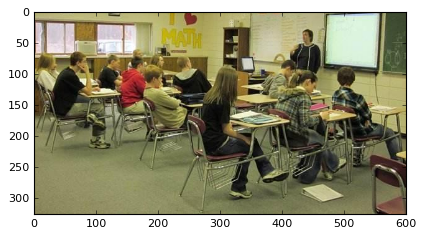

 /<EOS> 0.00205702 -6.18649769559
日本/<EOS> 0.000116026 -9.06169888883
小/学生/<EOS> 0.000108653 -9.12735081225
大/学生/<EOS> 9.89117e-05 -9.22128299075
小/朋友/<EOS> 8.26135e-05 -9.40133762715
在/一/起/<EOS> 6.2802e-05 -9.67552377179
广州/<EOS> 5.16375e-05 -9.8712625405
一/年级/<EOS> 5.08481e-05 -9.88666725007
韩国/<EOS> 4.14943e-05 -10.0899543435
最/早/的/图片/<EOS> 3.66249e-05 -10.2147827032
/home/gezi/data/imgs/im2txt/sendie.jpg 这是什么


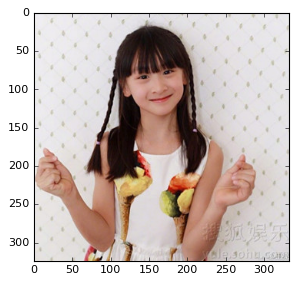

 /<EOS> 0.00260498 -5.95033170308
美女/<EOS> 0.00179051 -6.32525255901
美女/图片/<EOS> 0.00069643 -7.26954271197
日本/美女/<EOS> 0.000630333 -7.36926272072
少妇/<EOS> 0.000394825 -7.83706717005
美女/下面/<EOS> 0.00034118 -7.98310091829
日本/<EOS> 0.000249262 -8.29700566784
人/<EOS> 0.000149118 -8.81077388112
日本/美女/图片/<EOS> 0.000133067 -8.92465972307
2016/<EOS> 8.53375e-05 -9.36889646369
beam_search using time(ms): 9720.63207626
/home/gezi/data/imgs/im2txt/usa-campus.jpg 的


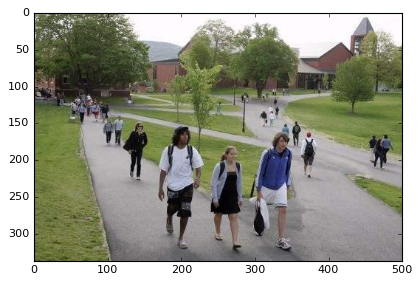

 /<EOS> 0.0115949 -4.45719291066
 / /<EOS> 0.000372121 -7.89629033034
小学/<EOS> 0.000256586 -8.26804539979
 /university/<EOS> 0.000140432 -8.87078474289
墨尔本/<EOS> 9.95053e-05 -9.21529959748
成都/<EOS> 9.37036e-05 -9.27537346138
北京/大学/<EOS> 7.84819e-05 -9.45264245907
广州/大学/<EOS> 7.68709e-05 -9.47338298188
广州/<EOS> 7.41477e-05 -9.50945094779
小学/ /<EOS> 4.72683e-05 -9.95967101366
/home/gezi/data/imgs/im2txt/usa-class.jpg 的


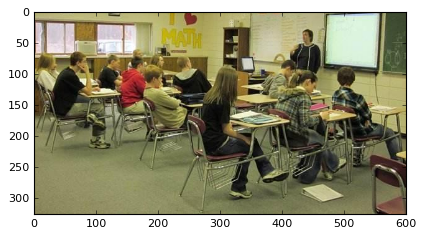

 /<EOS> 0.0203362 -3.89535284344
办公/室/<EOS> 0.000950056 -6.95898961533
 / /<EOS> 0.000419229 -7.77709385584
 /house/<EOS> 0.000321757 -8.04171371492
幼儿/园/<EOS> 0.000101759 -9.19290546387
幼儿/园/教室/<EOS> 0.000100311 -9.20723729148
在/办公/室/<EOS> 6.12192e-05 -9.70104978491
英国/<EOS> 5.79752e-05 -9.75549507639
办公/室/照片/<EOS> 5.51098e-05 -9.80618289858
日本/<EOS> 4.81785e-05 -9.94059756159
/home/gezi/data/imgs/im2txt/sendie.jpg 的


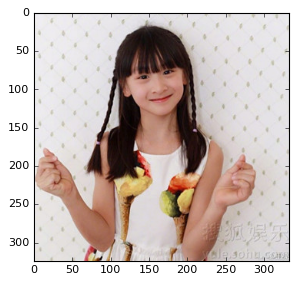

 /<EOS> 0.0330582 -3.40948585896
美女/<EOS> 0.00212043 -6.1561345693
高清/壁纸/<EOS> 0.00172933 -6.36002066244
qq/皮肤/<EOS> 0.000743253 -7.20447447567
 / /<EOS> 0.00064367 -7.34832387893
日本/美女/<EOS> 0.000625383 -7.37714574955
少妇/<EOS> 0.000470509 -7.66169455134
高清/<EOS> 0.000445054 -7.7173151964
日本/<EOS> 0.000372919 -7.8941498096
2016/<EOS> 0.000287998 -8.1525574195
beam_search using time(ms): 8409.24787521


In [12]:
def predicts(predictor, image_paths, input_texts):
  timer = gezi.Timer()
  word_ids_list = [_text2ids(utf82gbk(input_text), INPUT_TEXT_MAX_WORDS) for input_text in input_texts]
  image_raw = [melt.image.read_image(image_path) for image_path in image_paths]
  image_feature = image_model.process(image_raw)
  
  timer = gezi.Timer()
  texts_list, scores_list = predictor.inference(['beam_text', 'beam_text_score'], 
                                    feed_dict= {
                                      'imtxt2txt/model_init_1/image_feature:0': image_feature,
                                      'imtxt2txt/model_init_1/input_text:0': word_ids_list
                                      })

  for i in range(len(image_paths)):
  #for image_path, inpu_text, texts, scores in zip(image_paths, input_texts, texts_list, scores_list):
    image_path, input_text, texts, scores = image_paths[i], input_texts[i], texts_list[i], scores_list[i]
    print(image_path, input_text)
    image_show(image_path)
    for text, score in zip(texts, scores):
      print(gbk2utf8(text2ids.ids2text(text)), score, math.log(score))

  print('beam_search using time(ms):', timer.elapsed_ms())


titles = ['把孩子送到美国读高中，这十大事实怎能不知！',
         '把孩子送到美国读高中，这十大事实怎能不知！',
         '森碟九岁了！田亮晒女儿美照为其庆生']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), titles)

descs = ['美国高中生在学校的作息时间大致是，早七点半到下午两点半',
         '美国高中也分尖子班',
        '4月16日晚上，田亮在微博晒出了女儿田雨橙的照片，庆祝其九岁生日']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)

descs = ['美国高中校园',
         '李易峰',
        '蛋糕图片']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)

descs = ['这是什么',
         '今天天气不错',
        '美女脱衣']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)

descs = ['',
         '',
        '']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)


descs = ['这是什么',
         '这是什么',
        '这是什么']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)

descs = ['的',
         '的',
        '的']
predicts(predictor, glob.glob(image_dir + '/*.jpg'), descs)